In [1]:
import pandas as pd
import numpy as np

In [2]:
def get_RGB(diction,c_lambda,rgb_matrix):
    wavelen_arr = values_dict['lambda']
    X = np.trapz(c_lambda*values_dict['x'],wavelen_arr)
    Y = np.trapz(c_lambda*values_dict['y'],wavelen_arr)
    Z = np.trapz(c_lambda*values_dict['z'],wavelen_arr)
    XYZ = np.array([X,Y,Z])
    RGB = np.dot(np.linalg.inv(rgb_matrix),XYZ)
    return RGB

In [3]:
###Uploaded the given file CA1_Data.xlsx to colab
df = pd.read_excel('CA1_Data.xlsx')
values_dict = dict()
arr = np.array(df)

In [4]:
values_dict['lambda'] = arr[0]
values_dict['x'] = arr[3]
values_dict['y'] = arr[6]
values_dict['z'] = arr[9]
values_dict['philips'] = arr[12]
values_dict['silvania'] = arr[15]
values_dict['uniform'] = arr[18]

In [5]:
rgb_matrix = np.array([[0.49,0.31,0.2],[.177,.813,.01],[0,.01,.99]])

In [6]:
#TASK 1 : Uniform reflectance different illuminants
#reflectance for TASK 1
refl_matrix = np.ones_like(values_dict['lambda'])
philips_spectra_RGB = get_RGB(values_dict,values_dict['philips']*refl_matrix,rgb_matrix)
silvania_spectra_RGB = get_RGB(values_dict,values_dict['silvania']*refl_matrix,rgb_matrix)
uniform_spectra_RGB = get_RGB(values_dict,values_dict['uniform']*refl_matrix,rgb_matrix)
print("TASK 1 : Uniform reflectance different illuminants")
print(f"RGB Values for uniform_spectra is {uniform_spectra_RGB}\nRGB Values for philips_spectra is {philips_spectra_RGB}\nRGB Values for silvania_spectra is {silvania_spectra_RGB}")

TASK 1 : Uniform reflectance different illuminants
RGB Values for uniform_spectra is [4.9999974  5.00000082 4.9999284 ]
RGB Values for philips_spectra is [2.22760314 0.99755721 0.30182545]
RGB Values for silvania_spectra is [3.43375938 1.96024552 0.65181965]


In [7]:
#TASK 2 : Uniform illuminants different reflectance
x_reflectance = values_dict['x']/np.amax(values_dict['x'])
object_x_RGB = get_RGB(values_dict,values_dict['uniform']*x_reflectance,rgb_matrix)
y_reflectance = values_dict['y']/np.amax(values_dict['y'])
object_y_RGB = get_RGB(values_dict,values_dict['uniform']*y_reflectance,rgb_matrix)
z_reflectance = values_dict['z']/np.amax(values_dict['z'])
object_z_RGB = get_RGB(values_dict,values_dict['uniform']*z_reflectance,rgb_matrix)
print("TASK 2 : Uniform illuminants different reflectance")
print(f"RGB Values for object_x is {object_x_RGB}\nRGB Values for object_y is {object_y_RGB}\nRGB Values for object_z is {object_z_RGB}")

TASK 2 : Uniform illuminants different reflectance
RGB Values for object_x is [4.73066155 2.0265892  1.11929074]
RGB Values for object_y is [2.84601449 3.81928062 0.36328887]
RGB Values for object_z is [-0.33613932  0.3020626   3.71801045]


In [8]:
import matplotlib.pyplot as plt

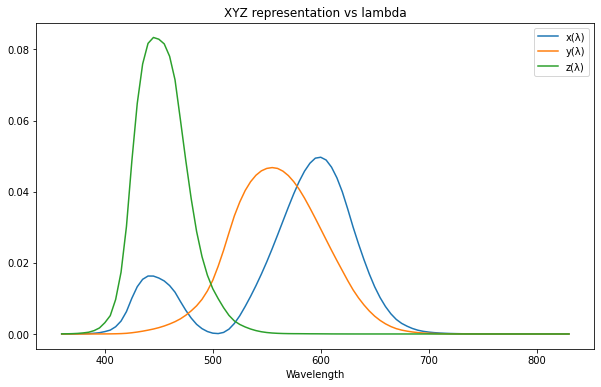

In [9]:
plt.figure(figsize=(10,6))
plt.title('XYZ representation vs lambda')
plt.xlabel('Wavelength')
plt.plot(values_dict['lambda'],values_dict['x'],label='x(λ)')
plt.plot(values_dict['lambda'],values_dict['y'],label='y(λ)')
plt.plot(values_dict['lambda'],values_dict['z'],label='z(λ)')
plt.legend()